https://colab.research.google.com/drive/1JXHjugYgoBt1qeVr6uX4D6YI0rECIKVm

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
file_id = "1w_4xTCDYcY-lu3p1zB3pT2EjM7CuXIaa"
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

In [3]:

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [4]:
# Prepare X and y
X = df.drop(columns=['stroke','id'])  # Features (predictors)
y = df['stroke']  # Target variable
X.shape

(43400, 10)

In [5]:
X['Residence_type'] = X['Residence_type'].map({'Rural': 0, 'Urban': 1})
X['ever_married'] = X['ever_married'].map({'No': 0, 'Yes': 1})

In [6]:
# Count the number of rows where gender is "Other" and stroke is 1
count_other_stroke_1 = X[(X['gender'] == "Other") & (y == 1)].shape[0]

print("Count of rows where gender is 'Other' and stroke is 1:", count_other_stroke_1)

# Get indices where gender is "Other"
indices_to_remove = X[X['gender'] == 'Other'].index

# Remove these indices from both X and y
X = X.drop(indices_to_remove)
y = y.drop(indices_to_remove)

print(f'After removing gender=="Other" rows: X shape = {X.shape}, y shape = {y.shape}')

Count of rows where gender is 'Other' and stroke is 1: 0
After removing gender=="Other" rows: X shape = (43389, 10), y shape = (43389,)


In [7]:
X['gender'] = X['gender'].map({'Female': 0, 'Male': 1})

# ignore smoking values of missing type

In [8]:
X = pd.get_dummies(X, columns=['smoking_status', 'work_type'])

In [9]:

# Count the number of missing values in each column
missing_values = X.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_values)


Number of missing values for each column:
gender                               0
age                                  0
hypertension                         0
heart_disease                        0
ever_married                         0
Residence_type                       0
avg_glucose_level                    0
bmi                               1458
smoking_status_formerly smoked       0
smoking_status_never smoked          0
smoking_status_smokes                0
work_type_Govt_job                   0
work_type_Never_worked               0
work_type_Private                    0
work_type_Self-employed              0
work_type_children                   0
dtype: int64


split first and apply unersampling on train then apply imputing and z-score normalization

In [10]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature DataFrame and y is your target Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34711, 16)
X_test shape: (8678, 16)
y_train shape: (34711,)
y_test shape: (8678,)


C:\Users\pouri\AppData\Local\Temp\ipykernel_6788\448175855.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_train.index, y=class_counts_train.values, palette="Blues", ax=axes[0])
C:\Users\pouri\AppData\Local\Temp\ipykernel_6788\448175855.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_test.index, y=class_counts_test.values, palette="Blues", ax=axes[1])


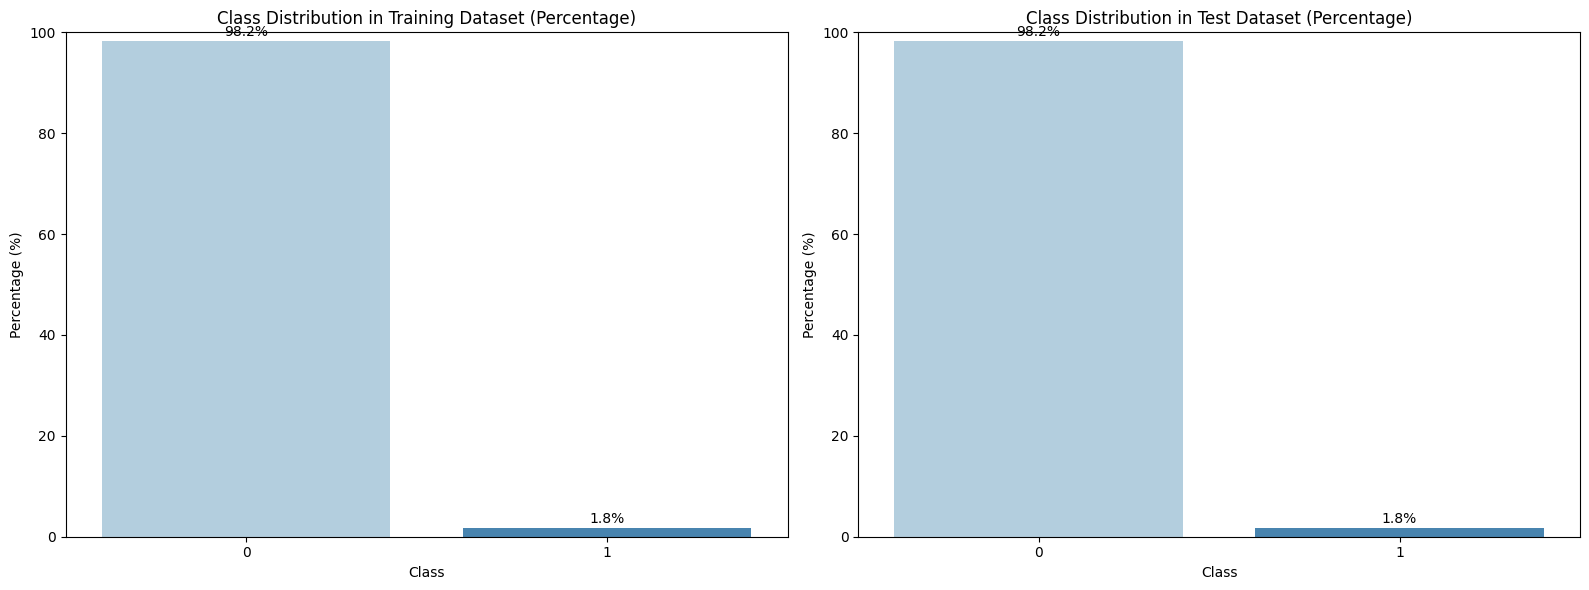

In [11]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of each class in y_train and y_test
class_counts_train = y_train.value_counts(normalize=True) * 100
class_counts_test = y_test.value_counts(normalize=True) * 100

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for y_train
sns.barplot(x=class_counts_train.index, y=class_counts_train.values, palette="Blues", ax=axes[0])
axes[0].set_title("Class Distribution in Training Dataset (Percentage)")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Percentage (%)")
for i, percentage in enumerate(class_counts_train):
    axes[0].text(i, percentage + 1, f'{percentage:.1f}%', ha='center')
axes[0].set_ylim(0, 100)  # Set y-axis limit to 100%

# Plot for y_test
sns.barplot(x=class_counts_test.index, y=class_counts_test.values, palette="Blues", ax=axes[1])
axes[1].set_title("Class Distribution in Test Dataset (Percentage)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Percentage (%)")
for i, percentage in enumerate(class_counts_test):
    axes[1].text(i, percentage + 1, f'{percentage:.1f}%', ha='center')
axes[1].set_ylim(0, 100)  # Set y-axis limit to 100%

# Display the plots
plt.tight_layout()
plt.show()

In [12]:
from sklearn.utils import resample

def undersample(X, y, undersample_ratio):
    # Combine X and y for easy manipulation
    data = pd.concat([X, y.rename('target')], axis=1)

    # Separate majority and minority classes
    data_majority = data[data['target'] == 0]
    data_minority = data[data['target'] == 1]

    # Calculate the target number of samples for the majority class
    n_minority = len(data_minority)
    n_majority = int(n_minority * undersample_ratio)

    # Perform undersampling on the majority class
    data_majority_undersampled = resample(data_majority,
                                          replace=False,
                                          n_samples=n_majority,
                                          random_state=42)

    # Combine the undersampled majority class with the minority class
    undersampled_data = pd.concat([data_majority_undersampled, data_minority])

    # Separate X and y after undersampling
    X_undersampled = undersampled_data.drop('target', axis=1)
    y_undersampled = undersampled_data['target']

    return X_undersampled, y_undersampled

In [13]:
ratios = [0.5,1.0, 1.5, 2.0,2.5,3.0,4.0,5.0,6.0,7.0,8.0,10.0]  # Define the desired undersample ratios
train_datasets = {}  # Dictionary to store the datasets

# Loop through each ratio and create undersampled datasets
for ratio in ratios:
    X_undersampled, y_undersampled = undersample(X_train, y_train, ratio)
    train_datasets[ratio] = (X_undersampled, y_undersampled)


In [14]:
# @title
for ratio, (X_undersampled, y_undersampled) in train_datasets.items():
    # Calculate class counts
    class_counts = y_undersampled.value_counts()

    # Print the counts for each class
    print(f"Undersample Ratio {ratio}:")
    print(f"Class 0 count: {class_counts.get(0, 0)}")
    print(f"Class 1 count: {class_counts.get(1, 0)}\n")

Undersample Ratio 0.5:
Class 0 count: 313
Class 1 count: 626

Undersample Ratio 1.0:
Class 0 count: 626
Class 1 count: 626

Undersample Ratio 1.5:
Class 0 count: 939
Class 1 count: 626

Undersample Ratio 2.0:
Class 0 count: 1252
Class 1 count: 626

Undersample Ratio 2.5:
Class 0 count: 1565
Class 1 count: 626

Undersample Ratio 3.0:
Class 0 count: 1878
Class 1 count: 626

Undersample Ratio 4.0:
Class 0 count: 2504
Class 1 count: 626

Undersample Ratio 5.0:
Class 0 count: 3130
Class 1 count: 626

Undersample Ratio 6.0:
Class 0 count: 3756
Class 1 count: 626

Undersample Ratio 7.0:
Class 0 count: 4382
Class 1 count: 626

Undersample Ratio 8.0:
Class 0 count: 5008
Class 1 count: 626

Undersample Ratio 10.0:
Class 0 count: 6260
Class 1 count: 626



In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define the columns for imputation and normalization
columns_to_impute = ['bmi']
columns_to_normalize = ['bmi', 'age', 'avg_glucose_level']

# Dictionary to store the processed train-test datasets for each ratio
processed_datasets = {}

# Loop through each ratio and process train and test sets
for ratio, (X_undersampled, y_undersampled) in train_datasets.items():

    # Step 1: Impute missing values in the 'bmi' column in the train set
    imputer = SimpleImputer(strategy="median")
    X_train_imputed = X_undersampled.copy()
    X_train_imputed[columns_to_impute] = imputer.fit_transform(X_train_imputed[columns_to_impute])

    # Apply the same imputation to the test set
    X_test_imputed = X_test.copy()
    X_test_imputed[columns_to_impute] = imputer.transform(X_test_imputed[columns_to_impute])

    # Step 2: Z-score normalization on the train set
    scaler = StandardScaler()
    X_train_scaled = X_train_imputed.copy()
    X_train_scaled[columns_to_normalize] = scaler.fit_transform(X_train_scaled[columns_to_normalize])

    # Apply the same normalization to the test set
    X_test_scaled = X_test_imputed.copy()
    X_test_scaled[columns_to_normalize] = scaler.transform(X_test_scaled[columns_to_normalize])

    # Store the processed train-test pair for this ratio
    processed_datasets[ratio] = ((X_train_scaled, y_undersampled), (X_test_scaled, y_test))

# The `processed_datasets` dictionary now contains tuples of (train, test) pairs for each ratio

In [16]:
# check for any missing values
test = True
for ratio, ((X_train_final, _), (X_test_final, _)) in processed_datasets.items():
    test1= X_train_final['bmi'].isnull().sum()
    test2= X_test_final['bmi'].isnull().sum()
    if test1 == 1 or test2 == 1:
      test = False
print(test)

True


converting data types to float64 for all columns

In [17]:
# Iterate through each ratio and apply the conversions on both train and test sets
for ratio, ((X_train_final, y_train_final), (X_test_final, y_test_final)) in processed_datasets.items():

    bool_columns_train = X_train_final.select_dtypes(include='bool').columns
    bool_columns_test = X_test_final.select_dtypes(include='bool').columns
    X_train_final[bool_columns_train] = X_train_final[bool_columns_train].astype(int)
    X_test_final[bool_columns_test] = X_test_final[bool_columns_test].astype(int)

    int_columns_train = X_train_final.select_dtypes(include='int').columns
    int_columns_test = X_test_final.select_dtypes(include='int').columns
    X_train_final[int_columns_train] = X_train_final[int_columns_train].astype(float)
    X_test_final[int_columns_test] = X_test_final[int_columns_test].astype(float)

    # Convert any remaining columns to float if they aren’t already in float dtype
    for df in [X_train_final, X_test_final]:
        df[df.select_dtypes(exclude='float').columns] = df.select_dtypes(exclude='float').astype(float)

    # Update
    processed_datasets[ratio] = ((X_train_final, y_train_final), (X_test_final, y_test_final))

    # Check if all columns are float in each dataset
    if all(dtype == 'float64' for dtype in X_train_final.dtypes) and all(dtype == 'float64' for dtype in X_test_final.dtypes):
        print(f"Dataset with ratio {ratio} is all float.")


Dataset with ratio 0.5 is all float.
Dataset with ratio 1.0 is all float.
Dataset with ratio 1.5 is all float.
Dataset with ratio 2.0 is all float.
Dataset with ratio 2.5 is all float.
Dataset with ratio 3.0 is all float.
Dataset with ratio 4.0 is all float.
Dataset with ratio 5.0 is all float.
Dataset with ratio 6.0 is all float.
Dataset with ratio 7.0 is all float.
Dataset with ratio 8.0 is all float.
Dataset with ratio 10.0 is all float.


# vectorized KNN implementation and results visualization

In [18]:
from sklearn.metrics import classification_report
def knn_predict(X_train, y_train, X_test, k=3):
    # Calculate Euclidean distances
    distances = np.sqrt(((X_test[:, np.newaxis] - X_train) ** 2).sum(axis=2))

    # Get the indices of the k nearest neighbors for each test sample
    nearest_neighbors = np.argsort(distances, axis=1)[:, :k]

    # Get the k nearest labels and perform majority voting
    top_k_labels = y_train[nearest_neighbors]
    predictions = np.array([np.bincount(labels).argmax() for labels in top_k_labels])

    return predictions

import numpy as np

def knn_predict_cos(X_train, y_train, X_test, k=3):
    # Normalize X_train and X_test to unit vectors for cosine similarity
    X_train_norm = X_train / np.linalg.norm(X_train, axis=1, keepdims=True)
    X_test_norm = X_test / np.linalg.norm(X_test, axis=1, keepdims=True)

    # Calculate cosine distance (1 - cosine similarity)
    cosine_similarity = np.dot(X_test_norm, X_train_norm.T)
    cosine_distance = 1 - cosine_similarity

    # Get the indices of the k nearest neighbors for each test sample
    nearest_neighbors = np.argsort(cosine_distance, axis=1)[:, :k]

    # Get the k nearest labels and perform majority voting
    top_k_labels = y_train[nearest_neighbors]
    predictions = np.array([np.bincount(labels).argmax() for labels in top_k_labels])

    return predictions

# search for best ratio in undersampling

In [42]:
len(processed_datasets[1][1][0])

8678

calculating distances:  25%|██▌       | 3/12 [00:00<00:00, 19.48it/s]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


calculating distances:  42%|████▏     | 5/12 [00:00<00:00, 12.32it/s]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


calculating distances:  58%|█████▊    | 7/12 [00:00<00:00,  7.63it/s]

<class 'pandas.core.frame.DataFrame'>


calculating distances:  67%|██████▋   | 8/12 [00:01<00:00,  5.13it/s]

<class 'pandas.core.frame.DataFrame'>


calculating distances:  75%|███████▌  | 9/12 [00:01<00:00,  3.77it/s]

<class 'pandas.core.frame.DataFrame'>


calculating distances:  83%|████████▎ | 10/12 [00:02<00:00,  2.78it/s]

<class 'pandas.core.frame.DataFrame'>


calculating distances:  92%|█████████▏| 11/12 [00:03<00:00,  2.12it/s]

<class 'pandas.core.frame.DataFrame'>


calculating distances: 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]


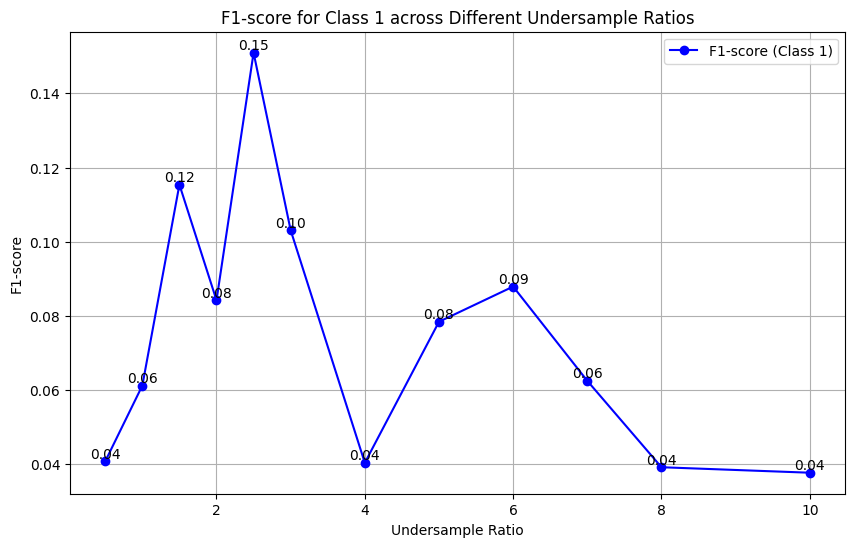

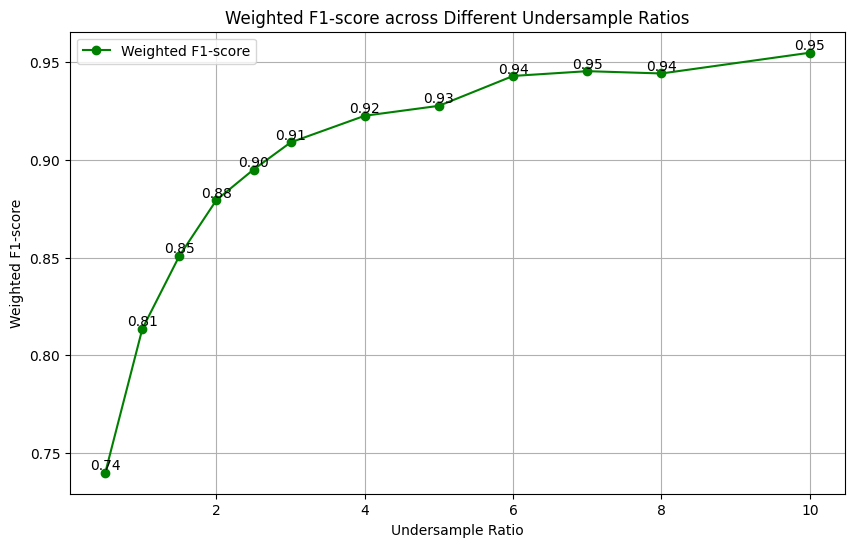

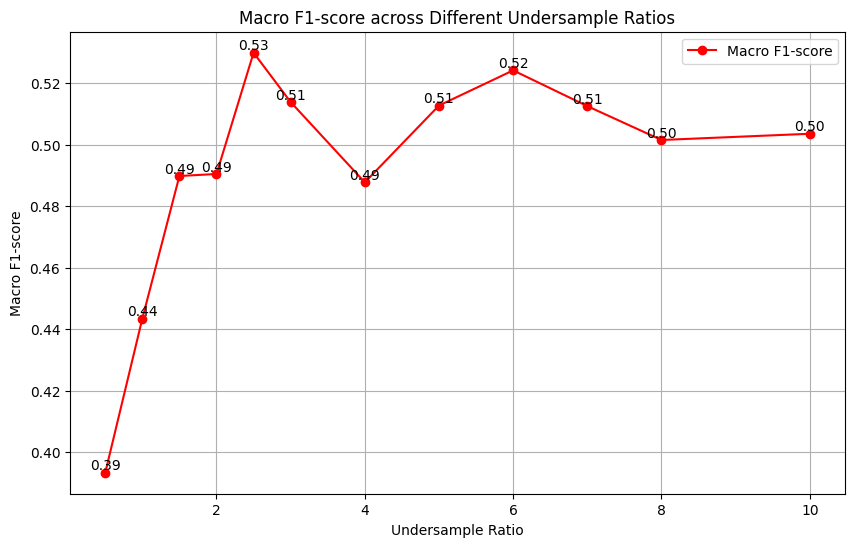

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tqdm import tqdm  # Import tqdm for progress bar

# Set up variables for storing results
k = 3  # Number of neighbors
reports = {}

# Loop through each processed training and test dataset with a progress bar
for ratio, ((X_train_ratio, y_train_ratio), (X_test_ratio, y_test_ratio)) in tqdm(processed_datasets.items(), desc="calculating distances"):
    X_test_values = X_test_ratio.values
    y_test_values = y_test_ratio.values
    sample_size = int(len(X_train_ratio) / 4)
    indices = np.random.choice(range(len(X_test_values)), size=sample_size, replace=False)
    X_test_sampled = X_test_values[indices]
    y_test_sampled = y_test_values[indices]
    y_pred = knn_predict(X_train_ratio.values, y_train_ratio.values, X_test_sampled, k=k)

    # Generate classification report
    report = classification_report(y_test_sampled, y_pred, output_dict=True)
    reports[ratio] = report

# Extract the f1, weighted f1, and macro f1 scores from each report
ratios = sorted(reports.keys())  # Get the ratios in sorted order for consistent plotting

# Prepare lists to store the values
f1_scores = []
weighted_f1_scores = []
macro_f1_scores = []

for ratio in ratios:
    f1_scores.append(reports[ratio]['1']['f1-score'])  # f1-score for class '1'
    weighted_f1_scores.append(reports[ratio]['weighted avg']['f1-score'])
    macro_f1_scores.append(reports[ratio]['macro avg']['f1-score'])

# Plot F1-score for class '1'
plt.figure(figsize=(10, 6))
plt.plot(ratios, f1_scores, marker='o', color='b', label='F1-score (Class 1)')
for i, score in enumerate(f1_scores):
    plt.text(ratios[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('Undersample Ratio')
plt.ylabel('F1-score')
plt.title('F1-score for Class 1 across Different Undersample Ratios')
plt.legend()
plt.grid()
plt.show()

# Plot Weighted F1-score
plt.figure(figsize=(10, 6))
plt.plot(ratios, weighted_f1_scores, marker='o', color='g', label='Weighted F1-score')
for i, score in enumerate(weighted_f1_scores):
    plt.text(ratios[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('Undersample Ratio')
plt.ylabel('Weighted F1-score')
plt.title('Weighted F1-score across Different Undersample Ratios')
plt.legend()
plt.grid()
plt.show()

# Plot Macro F1-score 
plt.figure(figsize=(10, 6))
plt.plot(ratios, macro_f1_scores, marker='o', color='r', label='Macro F1-score')
for i, score in enumerate(macro_f1_scores):
    plt.text(ratios[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('Undersample Ratio')
plt.ylabel('Macro F1-score')
plt.title('Macro F1-score across Different Undersample Ratios')
plt.legend()
plt.grid()
plt.show()


In [20]:
optimal_ratio= 3#

# search for K

Testing different k values: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


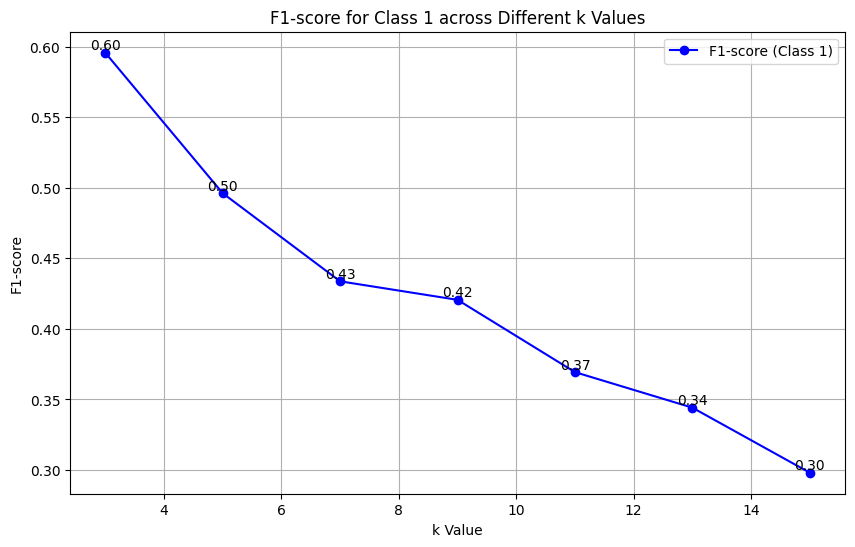

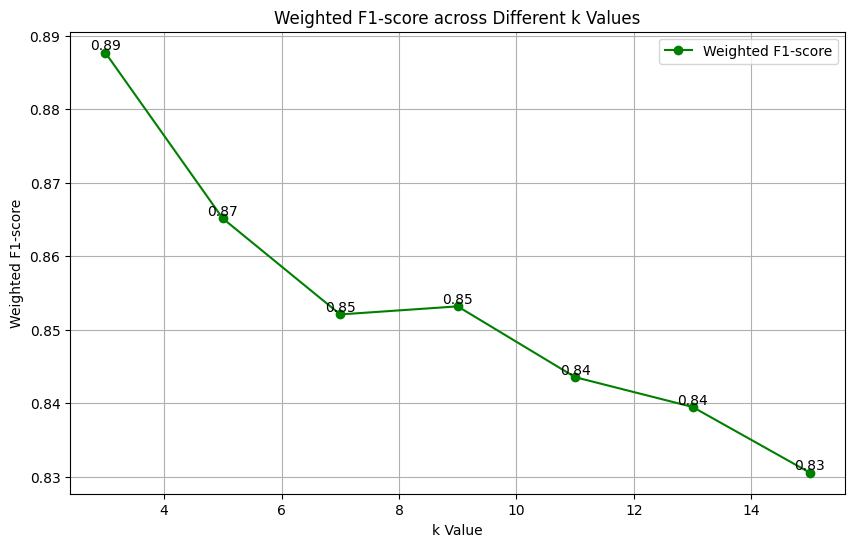

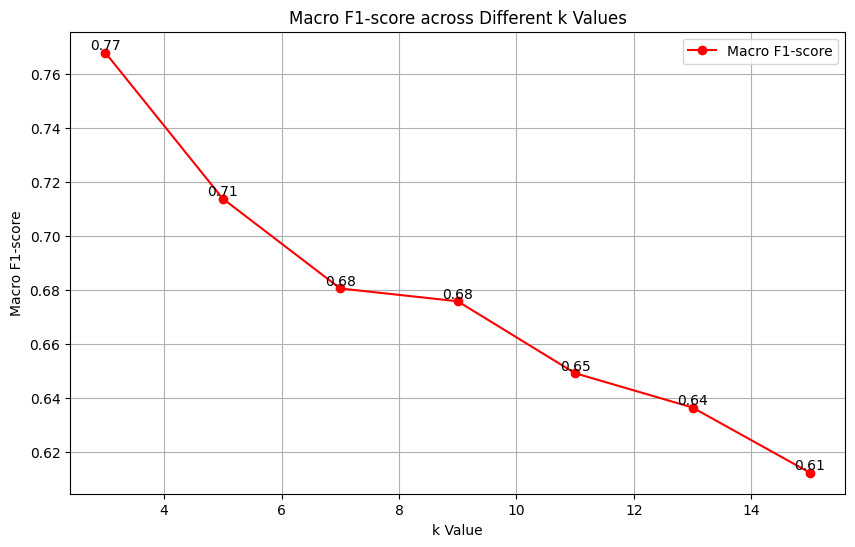

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tqdm import tqdm  # Import tqdm for progress bar

# Define the optimal ratio for this search
X_train_opt, y_train_opt = processed_datasets[optimal_ratio][0]

X_test_values = X_train_opt.values
y_test_values = y_train_opt.values
sample_size = int(len(X_train_opt) / 4)
indices = np.random.choice(range(len(X_test_values)), size=sample_size, replace=False)
X_test_opt = X_test_values[indices]
y_test_opt = y_test_values[indices]

# Range of k values to test
k_values = range(3, 16,2)  # For example, testing k values from 1 to 15

# Store the results
reports = {}

# Loop through each k value with a progress bar
for k in tqdm(k_values, desc="Testing different k values"):
    y_pred = knn_predict(X_train_opt.values, y_train_opt.values, X_test_opt, k=k)

    # Generate classification report
    report = classification_report(y_test_opt, y_pred, output_dict=True)
    reports[k] = report

# Extract the f1, weighted f1, and macro f1 scores from each report
k_list = sorted(reports.keys())  # Get the k values in sorted order for consistent plotting

# Prepare lists to store the values
f1_scores = []
weighted_f1_scores = []
macro_f1_scores = []

for k in k_list:
    f1_scores.append(reports[k]['1']['f1-score'])              # f1-score for class '1'
    weighted_f1_scores.append(reports[k]['weighted avg']['f1-score'])
    macro_f1_scores.append(reports[k]['macro avg']['f1-score'])

# Plot F1-score for class '1'
plt.figure(figsize=(10, 6))
plt.plot(k_list, f1_scores, marker='o', color='b', label='F1-score (Class 1)')
for i, score in enumerate(f1_scores):
    plt.text(k_list[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('k Value')
plt.ylabel('F1-score')
plt.title('F1-score for Class 1 across Different k Values')
plt.legend()
plt.grid()
plt.show()

# Plot Weighted F1-score
plt.figure(figsize=(10, 6))
plt.plot(k_list, weighted_f1_scores, marker='o', color='g', label='Weighted F1-score')
for i, score in enumerate(weighted_f1_scores):
    plt.text(k_list[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('k Value')
plt.ylabel('Weighted F1-score')
plt.title('Weighted F1-score across Different k Values')
plt.legend()
plt.grid()
plt.show()

# Plot Macro F1-score
plt.figure(figsize=(10, 6))
plt.plot(k_list, macro_f1_scores, marker='o', color='r', label='Macro F1-score')
for i, score in enumerate(macro_f1_scores):
    plt.text(k_list[i], score, f"{score:.2f}", ha='center', va='bottom')
plt.xlabel('k Value')
plt.ylabel('Macro F1-score')
plt.title('Macro F1-score across Different k Values')
plt.legend()
plt.grid()
plt.show()


In [80]:
optimal_ratio=3
optimal_k = 3

## euclidian grid search (k and ratio)

Testing different ratios:  75%|███████▌  | 9/12 [00:22<00:12,  4.24s/it]C:\Users\pouri\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pouri\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pouri\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Top 10 Models:
     k  ratio  f1_class_1  macro_f1  weighted_f1
75  13    8.0    0.181818  0.586058     0.977666
56   3    6.0    0.153846  0.566633     0.961325
73   9    8.0    0.137931  0.564480     0.977700
72   7    8.0    0.086957  0.539719     0.978332
68  13    7.0    0.106383  0.535764     0.945940
74  11    8.0    0.085106  0.534789     0.970418
67  11    7.0    0.095238  0.527819     0.941051
59   9    6.0    0.090909  0.521416     0.933052
60  11    6.0    0.080000  0.517990     0.936781
66   9    7.0    0.075472  0.517302     0.939370


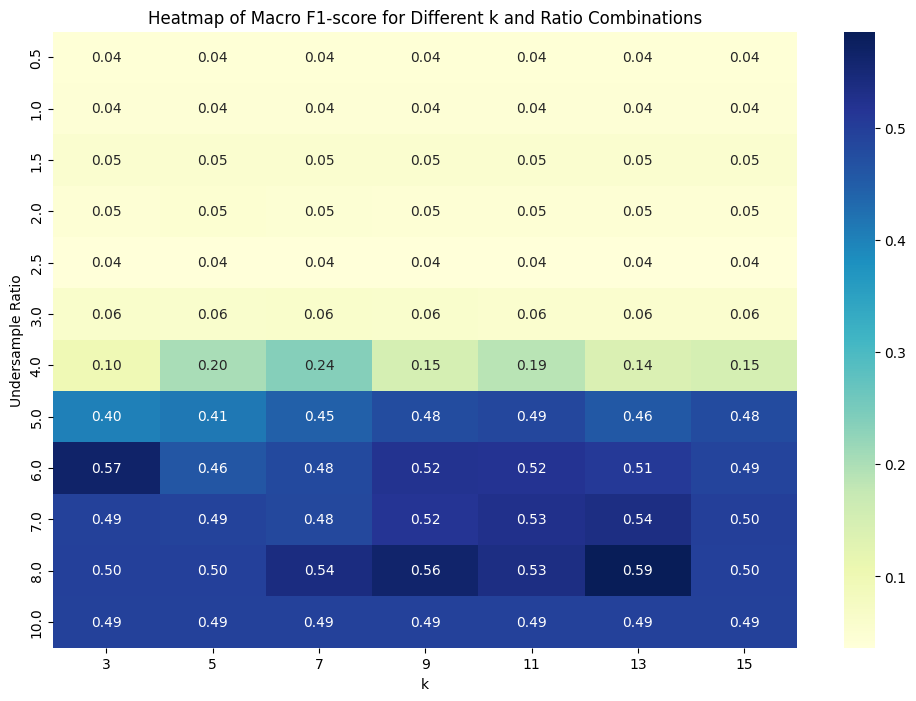

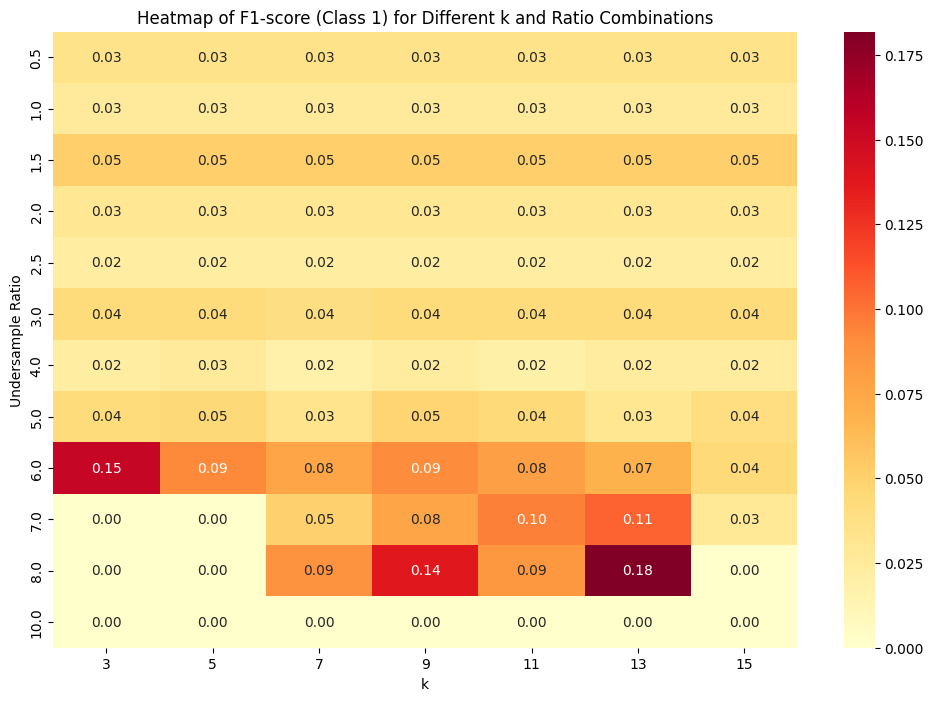

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from tqdm import tqdm  # Import tqdm for progress bar

# Define the parameter grid
ratios = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0]  # Undersampling ratios
k_values = range(3, 16, 2)  # k values to test (3, 5, ..., 15)

# DataFrame to store results for each (k, ratio) combination
results = []
X_test_values = X_test.values.astype(float)
y_test_values = y_test.values

# Grid search over both k and ratio
for ratio in tqdm(ratios, desc="Testing different ratios"):
    # Extract the train and test sets for the current ratio
    X_train_ratio, y_train_ratio = processed_datasets[ratio][0]
    sample_size = int(len(X_train_ratio) / 4)
    indices = np.random.choice(range(len(X_test_values)), size=sample_size, replace=False)
    X_test_sampled = X_test_values[indices]
    y_test_sampled = y_test_values[indices]

    for k in k_values:
        # Run KNN with the given k and ratio
        y_pred = knn_predict(X_train_ratio.values, y_train_ratio.values, X_test_sampled, k=k)

        # Generate classification report
        report = classification_report(y_test_sampled, y_pred, output_dict=True)

        # Store the metrics for this (k, ratio) combination
        results.append({
            'k': k,
            'ratio': ratio,
            'f1_class_1': report['1']['f1-score'],
            'macro_f1': report['macro avg']['f1-score'],
            'weighted_f1': report['weighted avg']['f1-score']
        })

# Convert results to a DataFrame for easy manipulation
results_df = pd.DataFrame(results)

# Sort by macro_f1 and f1_class_1 to find the top models
top_models = results_df.sort_values(by=['macro_f1', 'f1_class_1'], ascending=False).head(10)
print("Top 10 Models:")
print(top_models)

# Pivot the DataFrame for heatmap visualization
pivot_macro_f1 = results_df.pivot(index="ratio", columns="k", values="macro_f1")
pivot_f1_class_1 = results_df.pivot(index="ratio", columns="k", values="f1_class_1")

# Plot heatmap for Macro F1-score
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_macro_f1, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Macro F1-score for Different k and Ratio Combinations")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()

# Plot heatmap for F1-score (Class 1)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_f1_class_1, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Heatmap of F1-score (Class 1) for Different k and Ratio Combinations")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()



## cosine grid search (k and ratio)

Testing different ratios: 100%|██████████| 12/12 [00:14<00:00,  1.25s/it]


Top 5 Models by Macro F1-score:
     k  ratio  f1_class_1  macro_f1  weighted_f1
55  15    5.0    0.090909  0.534549     0.965906
63   3    7.0    0.101010  0.532002     0.949224
64   5    7.0    0.083333  0.528098     0.958652
51   7    5.0    0.088235  0.526991     0.953597
70   3    8.0    0.082474  0.524871     0.953442

Top 5 Models by F1-score for Class 1:
     k  ratio  f1_class_1  macro_f1  weighted_f1
14   3    1.5    0.120000  0.495484     0.853682
18  11    1.5    0.114943  0.502076     0.871387
32  11    2.5    0.113636  0.518051     0.906200
19  13    1.5    0.111111  0.497752     0.866594
31   9    2.5    0.107527  0.512305     0.900803


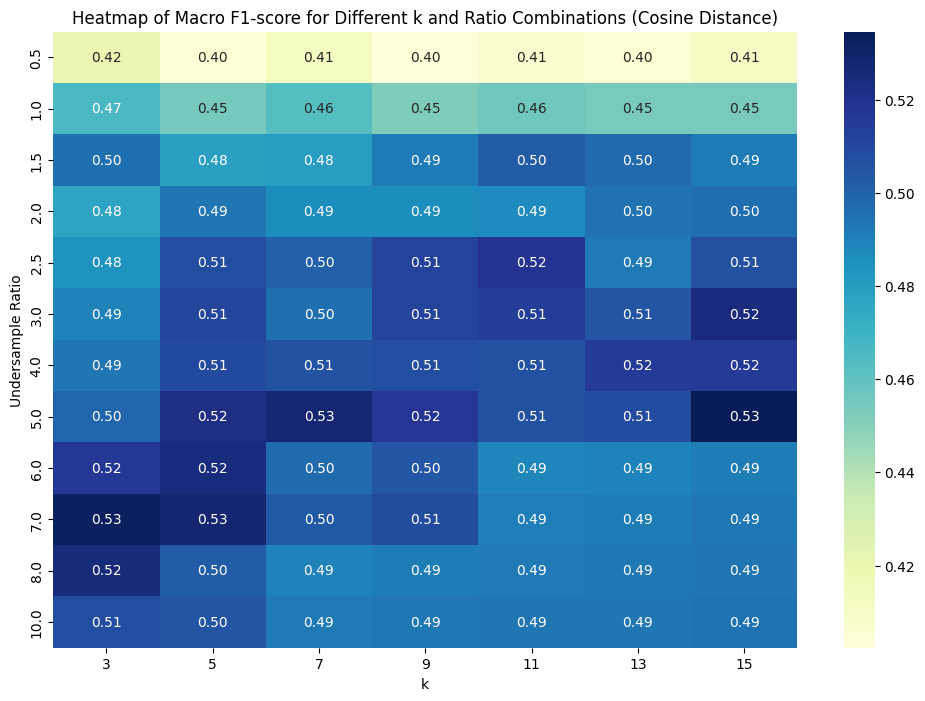

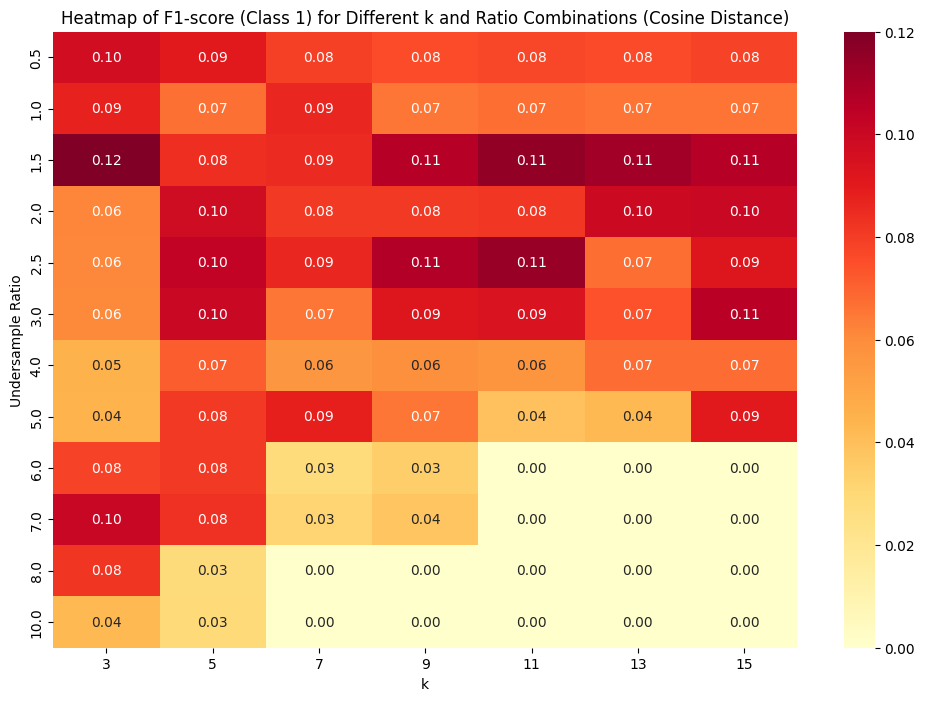

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from tqdm import tqdm  # Import tqdm for progress bar

# Define the parameter grid
ratios = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0]  # Undersampling ratios
k_values = range(3, 16, 2)  # k values to test (3, 5, ..., 15)

# DataFrame to store results for each (k, ratio) combination
results = []

# Grid search over both k and ratio
for ratio in tqdm(ratios, desc="Testing different ratios"):
    # Extract the train and test sets for the current ratio
    X_train_ratio, y_train_ratio = processed_datasets[ratio][0]
    X_test_ratio, y_test_ratio = processed_datasets[ratio][1]
    
    # Determine sample size: one fourth of the training set size
    sample_size = int(len(X_train_ratio) / 4)
    # Sample from the test set (assuming X_test_ratio is a DataFrame)
    X_test_sampled = X_test_ratio.sample(n=sample_size, random_state=42)
    # Get corresponding y_test values. If y_test_ratio is a Series/DataFrame, use .loc.
    y_test_sampled = y_test_ratio.loc[X_test_sampled.index] if hasattr(y_test_ratio, 'loc') else y_test_ratio[X_test_sampled.index]

    for k in k_values:
        # Initialize KNeighborsClassifier with cosine distance
        knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')

        # Fit the model on the training set
        knn.fit(X_train_ratio, y_train_ratio)

        # Predict on the sampled test set
        y_pred = knn.predict(X_test_sampled)

        # Generate classification report using the sampled test data
        report = classification_report(y_test_sampled, y_pred, output_dict=True)

        # Store the metrics for this (k, ratio) combination
        results.append({
            'k': k,
            'ratio': ratio,
            'f1_class_1': report['1']['f1-score'],
            'macro_f1': report['macro avg']['f1-score'],
            'weighted_f1': report['weighted avg']['f1-score']
        })

# Convert results to a DataFrame for easy manipulation
results_df = pd.DataFrame(results)

# Sort separately by macro_f1 and f1_class_1 and get top 5 for each
top_5_macro_f1 = results_df.sort_values(by='macro_f1', ascending=False).head(5)
top_5_f1_class_1 = results_df.sort_values(by='f1_class_1', ascending=False).head(5)

print("Top 5 Models by Macro F1-score:")
print(top_5_macro_f1)

print("\nTop 5 Models by F1-score for Class 1:")
print(top_5_f1_class_1)

# Pivot the DataFrame for heatmap visualization
pivot_macro_f1 = results_df.pivot(index="ratio", columns="k", values="macro_f1")
pivot_f1_class_1 = results_df.pivot(index="ratio", columns="k", values="f1_class_1")

# Plot heatmap for Macro F1-score
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_macro_f1, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Macro F1-score for Different k and Ratio Combinations (Cosine Distance)")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()

# Plot heatmap for F1-score (Class 1)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_f1_class_1, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Heatmap of F1-score (Class 1) for Different k and Ratio Combinations (Cosine Distance)")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()


## minkowski grid search (k and ratio)

Testing different ratios: 100%|██████████| 12/12 [01:00<00:00,  5.04s/it]


Top 5 Models by Macro F1-score:
     k  ratio  f1_class_1  macro_f1  weighted_f1
53  11    5.0    0.078431  0.526353     0.961872
56   3    6.0    0.083333  0.520654     0.942799
57   5    6.0    0.075000  0.519964     0.949487
81  11   10.0    0.048780  0.518657     0.973243
71   5    8.0    0.057143  0.516554     0.961608

Top 5 Models by F1-score for Class 1:
     k  ratio  f1_class_1  macro_f1  weighted_f1
10   9    1.0    0.118812  0.474644     0.816834
20  15    1.5    0.113636  0.500622     0.869793
18  11    1.5    0.112360  0.499181     0.868195
17   9    1.5    0.105263  0.490768     0.858527
12  13    1.0    0.096154  0.458039     0.806049


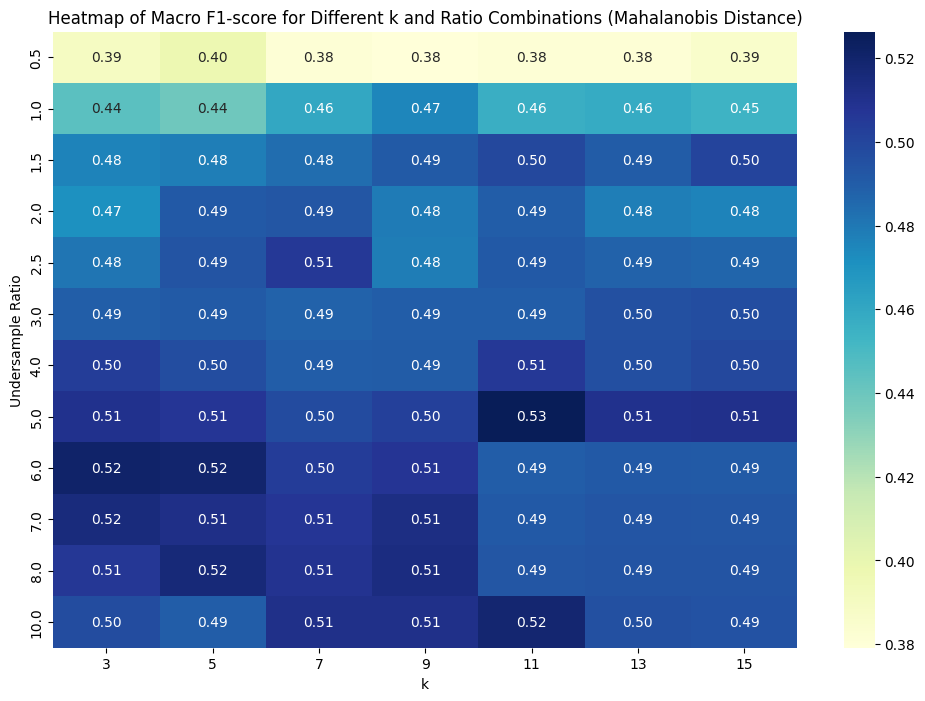

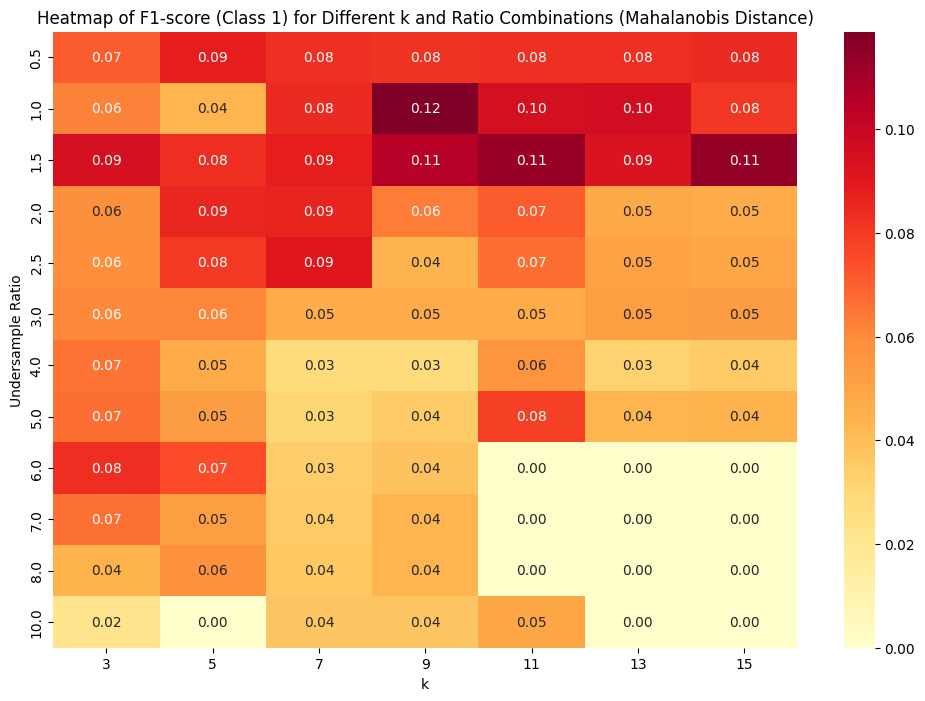

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from tqdm import tqdm  # Import tqdm for progress bar
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
import numpy as np

# Define the parameter grid
ratios = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0]  # Undersampling ratios
k_values = range(3, 16, 2)  # k values to test (3, 5, ..., 15)

# DataFrame to store results for each (k, ratio) combination
results = []

# Grid search over both k and ratio
for ratio in tqdm(ratios, desc="Testing different ratios"):
    # Extract the train and test sets for the current ratio
    X_train_ratio, y_train_ratio = processed_datasets[ratio][0]
    X_test_ratio, y_test_ratio = processed_datasets[ratio][1]
    
    # Determine sample size: one fourth of the training set size
    sample_size = int(len(X_train_ratio) / 4)
    # Sample from the test set (assuming X_test_ratio is a DataFrame)
    X_test_sampled = X_test_ratio.sample(n=sample_size, random_state=42)
    # Retrieve the corresponding y_test values (using .loc if available)
    y_test_sampled = y_test_ratio.loc[X_test_sampled.index] if hasattr(y_test_ratio, 'loc') else y_test_ratio[X_test_sampled.index]
    
    for k in k_values:
        cov_matrix = np.cov(X_train_ratio, rowvar=False)
        inv_cov_matrix = inv(cov_matrix)
        # Initialize KNeighborsClassifier with Mahalanobis distance
        knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})

        # Fit the model on the training set
        knn.fit(X_train_ratio, y_train_ratio)

        # Predict on the sampled test set
        y_pred = knn.predict(X_test_sampled)

        # Generate classification report
        report = classification_report(y_test_sampled, y_pred, output_dict=True)

        # Store the metrics for this (k, ratio) combination
        results.append({
            'k': k,
            'ratio': ratio,
            'f1_class_1': report['1']['f1-score'],
            'macro_f1': report['macro avg']['f1-score'],
            'weighted_f1': report['weighted avg']['f1-score']
        })

# Convert results to a DataFrame for easy manipulation
results_df = pd.DataFrame(results)

# Sort separately by macro_f1 and f1_class_1 and get top 5 for each
top_5_macro_f1 = results_df.sort_values(by='macro_f1', ascending=False).head(5)
top_5_f1_class_1 = results_df.sort_values(by='f1_class_1', ascending=False).head(5)

print("Top 5 Models by Macro F1-score:")
print(top_5_macro_f1)

print("\nTop 5 Models by F1-score for Class 1:")
print(top_5_f1_class_1)

# Pivot the DataFrame for heatmap visualization
pivot_macro_f1 = results_df.pivot(index="ratio", columns="k", values="macro_f1")
pivot_f1_class_1 = results_df.pivot(index="ratio", columns="k", values="f1_class_1")

# Plot heatmap for Macro F1-score
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_macro_f1, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Macro F1-score for Different k and Ratio Combinations (Mahalanobis Distance)")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()

# Plot heatmap for F1-score (Class 1)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_f1_class_1, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Heatmap of F1-score (Class 1) for Different k and Ratio Combinations (Mahalanobis Distance)")
plt.xlabel("k")
plt.ylabel("Undersample Ratio")
plt.show()
